In [129]:
# Lasciate questa cella così ogni volta che aggiornate un file python, 
# anche gli import nel notebook vengono aggiornati

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


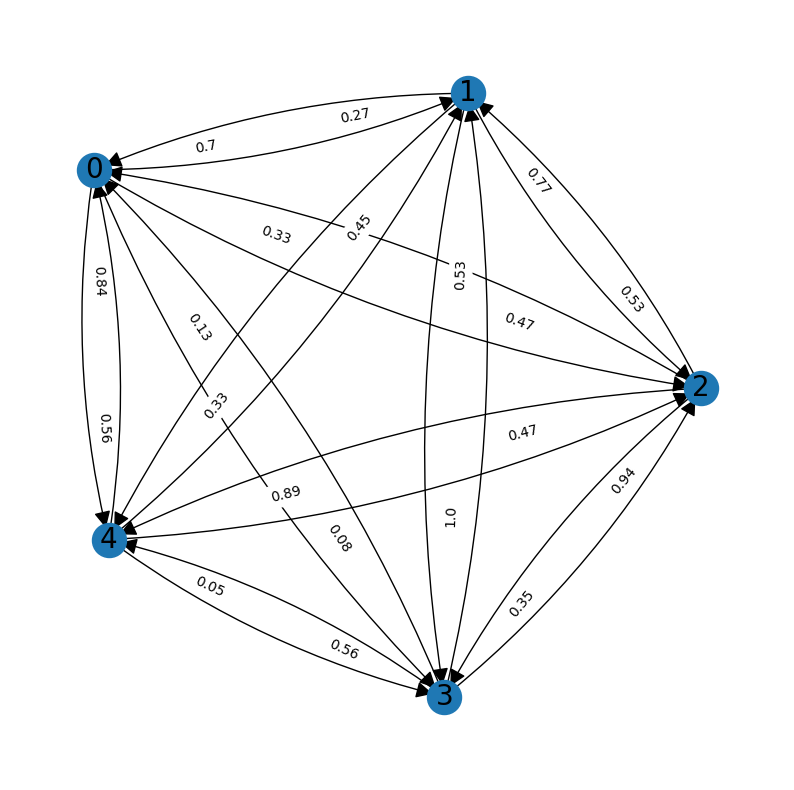

In [130]:
from Simulation import *

from Environment import *


click_probabilities = generate_click_probabilities(fully_connected=True)
observations_probabilities = generate_observation_probabilities(click_probabilities=click_probabilities)

concentration_params = [100] + [70] * NUM_OF_PRODUCTS
alpha_users = np.random.dirichlet( alpha= concentration_params, size = 1)


product_prices, users_reservation_prices = generate_prices(product_range=100, users_range=100)
tot_num_users = np.random.normal(loc=1000, scale=50)


env = Environment(users_reservation_prices = users_reservation_prices,
                    click_probabilities = click_probabilities,
                    observations_probabilities = observations_probabilities,
                    tot_num_users = tot_num_users)

Network.print_graph(G=env.network.G)

In [131]:
nodes_activation_probabilities = env.get_nodes_activation_probabilities(product_prices=product_prices)

k: 100%|██████████| 4688/4688 [00:02<00:00, 2289.16it/s]


In [132]:
B_cap = 100
budgets = np.linspace(start = 0, stop = B_cap, num= 11, endpoint=True)

In [170]:
from Ecommerce5 import *

In [162]:
ecomm5_ts = Ecommerce5_TS(B_cap = B_cap, budgets = budgets, product_prices = product_prices, tot_num_users = tot_num_users)

In [171]:
ecomm5_gpts = Ecommerce5_GPTS(B_cap = B_cap, budgets = budgets, product_prices = product_prices, tot_num_users = tot_num_users)

In [175]:
from Ecommerce5 import *
from tqdm import tqdm

for _ in tqdm(range(100)):
    arm, arm_idx = ecomm5_gpts.pull_arm()
    reward = env.round_step5(arm)
    ecomm5_gpts.update(arm_idx, reward)

[[12.]
 [10.]
 [ 0.]]
[0. 0. 0.]
[[12.]
 [10.]
 [ 0.]
 [ 4.]]
[0. 0. 0. 0.]
[[12.]
 [10.]
 [ 0.]
 [ 4.]
 [ 0.]]
[0. 0. 0. 0. 1.]
[[12.]
 [10.]
 [ 0.]
 [ 4.]
 [ 0.]
 [ 8.]]
[0. 0. 0. 0. 1. 0.]
[[12.]
 [10.]
 [ 0.]
 [ 4.]
 [ 0.]
 [ 8.]
 [ 1.]]
[0. 0. 0. 0. 1. 0. 0.]
[[12.]
 [10.]
 [ 0.]
 [ 4.]
 [ 0.]
 [ 8.]
 [ 1.]
 [ 1.]]
[0. 0. 0. 0. 1. 0. 0. 0.]
[[12.]
 [10.]
 [ 0.]
 [ 4.]
 [ 0.]
 [ 8.]
 [ 1.]
 [ 1.]
 [ 5.]]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[12.]
 [10.]
 [ 0.]
 [ 4.]
 [ 0.]
 [ 8.]
 [ 1.]
 [ 1.]
 [ 5.]
 [ 7.]]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[[12.]
 [10.]
 [ 0.]
 [ 4.]
 [ 0.]
 [ 8.]
 [ 1.]
 [ 1.]
 [ 5.]
 [ 7.]
 [ 5.]]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[12.]
 [10.]
 [ 0.]
 [ 4.]
 [ 0.]
 [ 8.]
 [ 1.]
 [ 1.]
 [ 5.]
 [ 7.]
 [ 5.]
 [ 2.]]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[[12.]
 [10.]
 [ 0.]
 [ 4.]
 [ 0.]
 [ 8.]
 [ 1.]
 [ 1.]
 [ 5.]
 [ 7.]
 [ 5.]
 [ 2.]
 [ 3.]]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[[12.]
 [10.]
 [ 0.]
 [ 4.]
 [ 0.]
 [ 8.]
 [ 1.]
 [ 1.]
 [ 5.]
 [ 7.]
 [ 5.]
 [ 2.]
 [ 

KeyboardInterrupt: 

In [126]:
ecomm5_ts.get_estimated_nodes_activation_probabilities()

array([[1.        , 0.10389558, 0.00412059, 0.55801541, 0.10183597],
       [0.04672911, 1.        , 0.39000266, 0.07953583, 0.01545689],
       [0.03999021, 0.30871705, 1.        , 0.119735  , 0.09539332],
       [0.08082719, 0.39277155, 0.25325399, 1.        , 0.35977751],
       [0.02388868, 0.06044255, 0.27889257, 0.16388511, 1.        ]])

In [128]:
env.get_nodes_activation_probabilities(product_prices)

array([[1.00000000e+00, 2.33148464e-01, 2.00511945e-02, 5.61220137e-01,
        1.32252560e-01],
       [9.59897611e-03, 1.00000000e+00, 5.11945392e-03, 2.20136519e-01,
        5.29010239e-02],
       [3.41296928e-03, 3.64761092e-01, 1.00000000e+00, 7.42320819e-02,
        7.27389078e-02],
       [2.13310580e-03, 3.22738908e-01, 3.32764505e-02, 1.00000000e+00,
        2.43174061e-01],
       [8.53242321e-04, 5.11945392e-02, 1.39291809e-01, 1.64249147e-02,
        1.00000000e+00]])